<a href="https://colab.research.google.com/github/aalexakos/thesis-smart-grids/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime
import time
import numpy as np
from ast import literal_eval
from sklearn.metrics import *
from google.colab import drive
import matplotlib.pyplot as plt
import pickle
drive.mount('/content/drive/')

model_location = '/content/drive/MyDrive/alexakos-thesis/'

path=(f'{model_location}datasets/random_forest.sav') 

model = pickle.load(open(path, 'rb'))


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=40, verbose=0, warm_start=False)

In [3]:
target_date = 1082021
data_location = '/content/drive/MyDrive/alexakos-thesis/datasets/August/'
sensor_data = 210801


In [4]:
#add data from the first date 
csv=(f'{data_location}{sensor_data}.csv') 
df=pd.read_csv(csv)
#add data from the rest of the month
for x in range(sensor_data+1, sensor_data+31):
  csv=(f'{data_location}{x}.csv') 
  df1=pd.read_csv(csv)
  df=df.append(df1,ignore_index=True)
df2=pd.read_csv(csv)
df=df.append(df2,ignore_index=True)
df.tail(50)

,gateway_id,sensor_id,timestamp,value,deployment_id,device_id,__dt
448843,HELIOS_mapper-p2z7tix9jogx0yxl,forwardActiveEnergyWh,1630428532305,6.340330e+07,HELIOS,grid-REF615-FE08,2021-08-31 00:00:00.000
448844,HELIOS_mapper-p2z7tix9jogx0yxl,reverseActiveEnergyVArh,1630428532305,3.467155e+06,HELIOS,grid-REF615-FE08,2021-08-31 00:00:00.000
448845,HELIOS_mapper-p2z7tix9jogx0yxl,reverseActiveEnergyWh,1630428532305,6.250000e+02,HELIOS,grid-REF615-FE08,2021-08-31 00:00:00.000
448846,HELIOS_mapper-p2z7tix9jogx0yxl,apparentPower,1630428532305,0.000000e+00,HELIOS,grid-REF615-FE08,2021-08-31 00:00:00.000
448847,HELIOS_mapper-p2z7tix9jogx0yxl,reactivePower,1630428532305,0.000000e+00,HELIOS,grid-REF615-FE08,2021-08-31 00:00:00.000
448848,HELIOS_mapper-p2z7tix9jogx0yxl,activePower,1630428532305,0.000000e+00,HELIOS,grid-REF615-FE08,2021-08-31 00:00:00.000
448849,HELIOS_mapper-p2z7tix9jogx0yxl,positiveSeqCurrentAmplitude,1630428532305,0.000000e+00,HELIOS,grid-REF615-FE08,2021-08-31 00:00:00.000
448850,HELIOS_mapper-p2z7tix9jogx0yxl,phaseCurrentC,1630428532305,0.000000e+00,HELIOS,grid-REF615-FE08,2021-08-31 00:00:00.000
448851,HELIOS_mapper-p2z7tix9jogx0yxl,phaseCurrentB,1630428532305,0.000000e+00,HELIOS,grid-REF615-FE08,2021-08-31 00:00:00.000
448852,HELIOS_mapper-p2z7tix9jogx0yxl,phaseCurrentA,1630428532305,0.000000e+00,HELIOS,grid-REF615-FE08,2021-08-31 00:00:00.000


In [5]:
#get the active power from the original sensors dataset
active_power = df.loc[df['sensor_id']=='activePower'].reset_index(drop=True)
active_power['datetime']=(pd.to_datetime(active_power['timestamp'],unit='ms'))
active_power['datetime'] = active_power['datetime'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour,1*(dt.minute // 1)))
active_power['timestamp'] = active_power['datetime'].astype('int64')
active_power.drop(columns=['__dt', 'deployment_id', 'sensor_id', 'gateway_id'], inplace=True)
active_power['timestamp']=active_power['timestamp'].floordiv(1000000)
active_power.sort_values('timestamp', inplace=True, ignore_index= True)
active_power['datetime'] = pd.to_datetime(active_power['timestamp'],unit='ms')
active_power = active_power.groupby(pd.Grouper(key='datetime', freq='h')).value.mean()
active_power=active_power.to_frame()
active_power[active_power < 0] = 0

active_power=active_power.rename(columns={'value': 'active_power'}).dropna().reset_index()

active_power['datetime'] = pd.to_datetime(active_power['datetime'], errors='coerce')

active_power['timestamp'] = active_power['datetime'].astype('int64')
active_power['timestamp']=active_power['timestamp'].floordiv(1000000000)


active_power

,datetime,active_power,timestamp
0,2021-08-01 03:00:00,0.000000,1627786800
1,2021-08-01 04:00:00,148.750000,1627790400
2,2021-08-01 05:00:00,755.600000,1627794000
3,2021-08-01 06:00:00,1652.266667,1627797600
4,2021-08-01 07:00:00,2421.233333,1627801200
...,...,...,...
543,2021-08-31 17:00:00,0.000000,1630429200
544,2021-08-31 18:00:00,0.000000,1630432800
545,2021-08-31 19:00:00,0.000000,1630436400
546,2021-08-31 20:00:00,0.000000,1630440000


In [6]:
csv=(f'{data_location}dailyClimaCellForecast0{target_date}.csv') 
climacell=pd.read_csv(csv,index_col=0)
#only keep data from one day (api gives a 16 day forecast)
climacell=climacell.head(24)
#add data from the rest of the month
for x in range(target_date+1000000, target_date+9000000, 1000000):
  csv=(f'{data_location}dailyClimaCellForecast0{x}.csv')   
  df1=pd.read_csv(csv,index_col=0)
  #only keep data from one day (api gives a 16 day forecast)
  df1=df1.head(24)
  climacell=climacell.append(df1,ignore_index=True)
for x in range(target_date+9000000, target_date+31000000, 1000000):
  csv=(f'{data_location}dailyClimaCellForecast{x}.csv')   
  df1=pd.read_csv(csv,index_col=0)
  #only keep data from one day (api gives a 16 day forecast)
  df1=df1.head(24)
  climacell=climacell.append(df1,ignore_index=True)

In [7]:
#------------------radiation from clima cell forecast prediction----------------------

#add epoch time in the dataframe
climacell['timestamp']=climacell['startTime'].astype('datetime64[s]')
climacell['timestamp']=climacell['timestamp'].astype('int64')
#removing milliseconds from timestamp
climacell['timestamp']=climacell['timestamp'].floordiv(1000000000)


climacell.values=climacell['values'].apply(literal_eval)
value = [d.get('solarGHI') for d in climacell['values']]
weather = [w.get('weatherCode') for w in climacell['values']]
temp_air = [d.get('temperature') for d in climacell['values']]
windSpeed = [w.get('windSpeed') for w in climacell['values']]
climacell['temp_air']=pd.DataFrame({'temp_air':temp_air})
climacell['windSpeed']=pd.DataFrame({'windSpeed':windSpeed})
climacell['values']=pd.DataFrame({'radiation':value})
climacell['weatherCode']=pd.DataFrame({'weatherCode':weather})
climacell.tail(20)

,startTime,values,timestamp,temp_air,windSpeed,weatherCode
724,2021-08-31T09:00:00Z,709.0,1630400400,26.82,2.51,1000
725,2021-08-31T10:00:00Z,819.0,1630404000,27.89,3.51,1000
726,2021-08-31T11:00:00Z,861.0,1630407600,28.47,4.07,1000
727,2021-08-31T12:00:00Z,829.0,1630411200,28.90,4.44,1000
728,2021-08-31T13:00:00Z,743.0,1630414800,29.06,4.69,1000
729,2021-08-31T14:00:00Z,606.0,1630418400,28.79,4.42,1000
730,2021-08-31T15:00:00Z,429.0,1630422000,27.99,4.06,1000
731,2021-08-31T16:00:00Z,235.0,1630425600,26.59,3.15,1000
732,2021-08-31T17:00:00Z,64.0,1630429200,24.64,2.03,1000
733,2021-08-31T18:00:00Z,0.0,1630432800,22.64,1.81,1000


In [8]:
combined=active_power.merge(climacell, how='inner', on='timestamp')

combined.drop([ 'startTime'],axis=1, inplace=True)
# combined.dropna()
combined.rename(columns={'values': 'tomorrow'}, inplace=True)

combined.replace([np.inf, -np.inf], np.nan, inplace=True)

combined.fillna(0,inplace=True)

combined

,datetime,active_power,timestamp,tomorrow,temp_air,windSpeed,weatherCode
0,2021-08-01 05:00:00,755.600000,1627794000,74.12,22.68,0.87,1000
1,2021-08-01 06:00:00,1652.266667,1627797600,258.53,26.79,0.49,1000
2,2021-08-01 07:00:00,2421.233333,1627801200,449.08,29.67,0.62,1000
3,2021-08-01 08:00:00,2991.800000,1627804800,628.06,32.25,0.70,1000
4,2021-08-01 09:00:00,3307.896552,1627808400,776.50,34.95,1.26,1000
...,...,...,...,...,...,...,...
541,2021-08-31 17:00:00,0.000000,1630429200,64.00,24.64,2.03,1000
542,2021-08-31 18:00:00,0.000000,1630432800,0.00,22.64,1.81,1000
543,2021-08-31 19:00:00,0.000000,1630436400,0.00,21.56,1.80,1000
544,2021-08-31 20:00:00,0.000000,1630440000,0.00,20.63,1.84,1000


In [9]:
!pip install pysolar
from pysolar.solar import *
date=[]
rad=[]
alt=[]
horiz=[]
latitude_deg = 39.10151 # positive in the northern hemisphere
longitude_deg = 21.04305 # negative reckoning west from prime meridian in Greenwich, England
for index in combined['timestamp']:
  date.append(datetime.datetime.utcfromtimestamp(index).strftime('%Y-%m-%d %H:%M:%S:%f'))
for row,index in enumerate(date):  
  date[row]=datetime.datetime.fromisoformat(index)

for index in date: 
  date = datetime.datetime(index.year, index.month, index.day, index.hour, index.minute, index.second, index.microsecond, tzinfo=datetime.timezone.utc)
  altitude_deg = get_altitude(latitude_deg, longitude_deg, date)
  alt.append(altitude_deg)
  radiation_direct=radiation.get_radiation_direct(date, altitude_deg)
  rad.append(radiation_direct)
  radiation_horizontal=radiation_direct*math.cos(math.radians(altitude_deg))
  horiz.append(radiation_horizontal)

     |████████████████████████████████| 47 kB 1.8 MB/s 


In [10]:
combined['pySolar']=rad
combined['altidute']=alt
combined['altidute'] =combined['altidute'].apply(lambda x:0 if x<0 else x) #negative altidute values are set to 0
combined['p_solar_horizontal']=horiz
combined['tomorrow_modular']=((combined['tomorrow'])/(math.radians(combined['altidute'])))*math.sin(math.radians(combined['altidute'])+math.radians(25)).drop_duplicates()
combined.rename(columns={'value':'sensor_avg'}, inplace=True)
combined['hour']=combined.datetime.dt.hour
# !cp data.csv "drive/My Drive/"


In [11]:
combined

,datetime,active_power,timestamp,tomorrow,temp_air,windSpeed,weatherCode,pySolar,altidute,p_solar_horizontal,tomorrow_modular,hour
0,2021-08-01 05:00:00,755.600000,1627794000,74.12,22.68,0.87,1000,483.659035,14.655216,467.923575,184.926707,5
1,2021-08-01 06:00:00,1652.266667,1627797600,258.53,26.79,0.49,1000,684.967887,26.162845,614.789149,441.009407,6
2,2021-08-01 07:00:00,2421.233333,1627801200,449.08,29.67,0.62,1000,780.979905,37.762289,617.410104,605.823523,7
3,2021-08-01 08:00:00,2991.800000,1627804800,628.06,32.25,0.70,1000,832.509880,49.068145,545.427963,705.202016,8
4,2021-08-01 09:00:00,3307.896552,1627808400,776.50,34.95,1.26,1000,860.736264,59.362638,438.633426,745.839469,9
...,...,...,...,...,...,...,...,...,...,...,...,...
541,2021-08-31 17:00:00,0.000000,1630429200,64.00,24.64,2.03,1000,0.025329,1.049866,0.025325,1533.856503,17
542,2021-08-31 18:00:00,0.000000,1630432800,0.00,22.64,1.81,1000,0.000000,0.000000,0.000000,NaN,18
543,2021-08-31 19:00:00,0.000000,1630436400,0.00,21.56,1.80,1000,0.000000,0.000000,0.000000,NaN,19
544,2021-08-31 20:00:00,0.000000,1630440000,0.00,20.63,1.84,1000,0.000000,0.000000,0.000000,NaN,20


In [12]:
combined=combined.drop(columns=['pySolar','p_solar_horizontal','datetime','tomorrow_modular'])
combined

,active_power,timestamp,tomorrow,temp_air,windSpeed,weatherCode,altidute,hour
0,755.600000,1627794000,74.12,22.68,0.87,1000,14.655216,5
1,1652.266667,1627797600,258.53,26.79,0.49,1000,26.162845,6
2,2421.233333,1627801200,449.08,29.67,0.62,1000,37.762289,7
3,2991.800000,1627804800,628.06,32.25,0.70,1000,49.068145,8
4,3307.896552,1627808400,776.50,34.95,1.26,1000,59.362638,9
...,...,...,...,...,...,...,...,...
541,0.000000,1630429200,64.00,24.64,2.03,1000,1.049866,17
542,0.000000,1630432800,0.00,22.64,1.81,1000,0.000000,18
543,0.000000,1630436400,0.00,21.56,1.80,1000,0.000000,19
544,0.000000,1630440000,0.00,20.63,1.84,1000,0.000000,20


In [13]:
# Split the data into training and testing sets
features=combined.drop(['active_power'], axis='columns')

features_with_cols = features 
# Labels are the values we want to predict
labels=np.array(combined.active_power)

# Saving feature names for later use
# feature_list = list(features.columns)

# Convert to numpy array
# features = np.array(features)

In [14]:
# # One-hot encode the data using pandas get_dummies
# one_hot = pd.get_dummies(features['weatherCode'])

# features.drop('weatherCode', axis=1, inplace =True)

# features = features.join(one_hot)

# Saving feature names for later use
feature_list = list(features.columns)

features = np.array(features)

# Display the first 5 rows of the last 12 columns
features

array([[1.62779400e+09, 7.41200000e+01, 2.26800000e+01, ...,
        1.00000000e+03, 1.46552164e+01, 5.00000000e+00],
       [1.62779760e+09, 2.58530000e+02, 2.67900000e+01, ...,
        1.00000000e+03, 2.61628453e+01, 6.00000000e+00],
       [1.62780120e+09, 4.49080000e+02, 2.96700000e+01, ...,
        1.00000000e+03, 3.77622890e+01, 7.00000000e+00],
       ...,
       [1.63043640e+09, 0.00000000e+00, 2.15600000e+01, ...,
        1.00000000e+03, 0.00000000e+00, 1.90000000e+01],
       [1.63044000e+09, 0.00000000e+00, 2.06300000e+01, ...,
        1.00000000e+03, 0.00000000e+00, 2.00000000e+01],
       [1.63044360e+09, 0.00000000e+00, 1.99400000e+01, ...,
        1.00000000e+03, 0.00000000e+00, 2.10000000e+01]])

In [15]:
combined['predicted']=model.predict(features)
model.score(features,labels)

0.8388751743687508

In [16]:
combined[combined.weatherCode==4000]

,active_power,timestamp,tomorrow,temp_air,windSpeed,weatherCode,altidute,hour,predicted
92,0.000000,1628218800,0.00,25.12,0.81,4000,0.000000,3,316.696882
212,1006.800000,1628780400,309.92,35.84,3.18,4000,28.729063,15,1421.738257
213,186.533333,1628784000,201.57,34.50,3.27,4000,17.116356,16,376.528883
214,3.100000,1628787600,82.45,31.86,2.27,4000,5.745578,17,118.339654
215,0.000000,1628791200,8.47,29.95,1.34,4000,0.000000,18,169.066448
371,2958.862069,1629547200,737.00,33.03,4.80,4000,57.431147,12,2378.449179
374,798.733333,1629558000,339.00,28.71,4.00,4000,26.612199,15,1512.259058
461,1029.633333,1629979200,484.00,29.84,4.39,4000,55.781949,12,2213.672499
462,0.375000,1629982800,347.00,28.88,0.90,4000,47.126182,13,1161.659465


In [17]:
df=combined
df['datetime']=(pd.to_datetime(df['timestamp'],unit='s'))
df['hour']=df.datetime.dt.hour
df.drop(df[df.hour > 16].index, inplace=True)
df.drop(df[df.hour < 5].index, inplace=True)

In [18]:
errors = pd.DataFrame(columns=['hour','active_power/machine_learning_power'])
errors['hour']=df['hour']
errors=errors.drop_duplicates()
errors=errors.sort_values(by='hour', ignore_index=True).reset_index(drop=True)

In [19]:
#Error % (park acive power) vs  (ML)
sensor=[]
rf=[]
for hour_new in errors['hour']:
  for i,hour in enumerate(df.hour):
    if (hour_new == hour): 
      sensor.append(df.iloc[i].active_power)
      rf.append(df.iloc[i].predicted)
  errors.loc[errors['hour'] == hour_new, 'active_power/machine_learning_power'] = abs(sum(rf)-sum(sensor))/sum(sensor)*100
  rf.clear()      
  sensor.clear()

Text(0.5, 0, 'hour (GMT)')

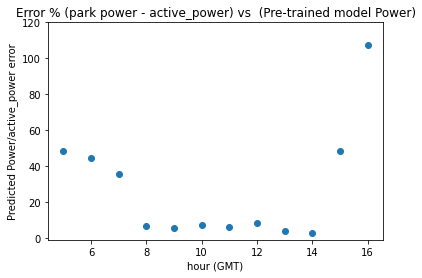

In [20]:
plt.scatter(errors.hour,errors['active_power/machine_learning_power'])
ax = plt.gca()
ax.set_ylim([-1, 120])
plt.title("Error % (park power - active_power) vs  (Pre-trained model Power)")
plt.ylabel("Predicted Power/active_power error")
plt.xlabel("hour (GMT)")

In [21]:
errors

,hour,active_power/machine_learning_power
0,5,48.1905
1,6,44.7262
2,7,35.5403
3,8,6.90023
4,9,5.56916
5,10,7.50876
6,11,6.3986
7,12,8.39187
8,13,3.84356
9,14,2.68492


In [22]:
#export discrete weather codes
wcode_errors = pd.DataFrame(columns=['weather_code','active_power/machine_learning_power'])
wcode_errors['weather_code']=df['weatherCode']
wcode_errors=wcode_errors.drop_duplicates()
wcode_errors.sort_values(by='weather_code', ignore_index=True)
wcode_errors

,weather_code,active_power/machine_learning_power
0,1000,NaN
64,1101,NaN
67,1100,NaN
82,1001,NaN
97,1102,NaN
212,4000,NaN


Text(0.5, 1.0, 'Error % (park active power) vs  (predicted_power) per weather code')

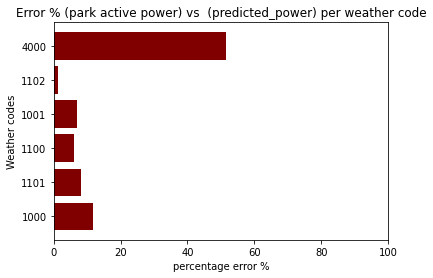

In [23]:
sensor=[]
predicted_temp=[]
for code in wcode_errors['weather_code']:
  for i,weatherCode in enumerate(df.weatherCode):
    if (code == weatherCode): 
      sensor.append(df.iloc[i].active_power)
      predicted_temp.append(df.iloc[i].predicted)
  wcode_errors.loc[wcode_errors['weather_code'] == code, 'active_power/machine_learning_power'] = abs(sum(predicted_temp)-sum(sensor))/sum(sensor)*100
  sensor.clear()
  predicted_temp.clear()
wcode_errors['weather_code']=wcode_errors['weather_code'].map(str)

# creating the bar plot
plt.barh(wcode_errors.weather_code, wcode_errors['active_power/machine_learning_power'], color='maroon')
ax = plt.gca()
ax.set_xlim([0, 100])
plt.ylabel("Weather codes")
plt.xlabel("percentage error %")
plt.title("Error % (park active power) vs  (predicted_power) per weather code")


In [24]:
df['day']=df.datetime.dt.day

In [25]:
#export discrete days
daily_energy = pd.DataFrame(columns=['day', 'active_power', 'predicted'])
daily_energy['day']=df['day']
daily_energy.index=daily_energy.day
daily_energy=daily_energy.drop_duplicates()
daily_energy

,day,active_power,predicted
day,,,
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,NaN
4,4,NaN,NaN
5,5,NaN,NaN
6,6,NaN,NaN
7,7,NaN,NaN
8,8,NaN,NaN
9,9,NaN,NaN


In [26]:
#Error % (park acive power) vs  (ML)
sensor=[]
rf=[]
for day_new in daily_energy.day:
  for i,day in enumerate(df.day):
    if (day_new == day): 
      sensor.append(df.iloc[i].active_power)
      rf.append(df.iloc[i].predicted)
  daily_energy.at[day_new, 'active_power']=sum(sensor)
  daily_energy.at[day_new, 'predicted']=sum(rf)

  rf.clear()      
  sensor.clear()

In [27]:
daily_energy

,day,active_power,predicted
day,,,
1,1,26591,25276.2
2,2,25591.3,24845.3
3,3,26369.3,24569.9
4,4,25653.5,24580.3
5,5,25799.2,22532.1
6,6,14893.4,21971.4
7,7,12447.2,12068
8,8,26870.1,23083.9
9,9,26439.5,22970.2


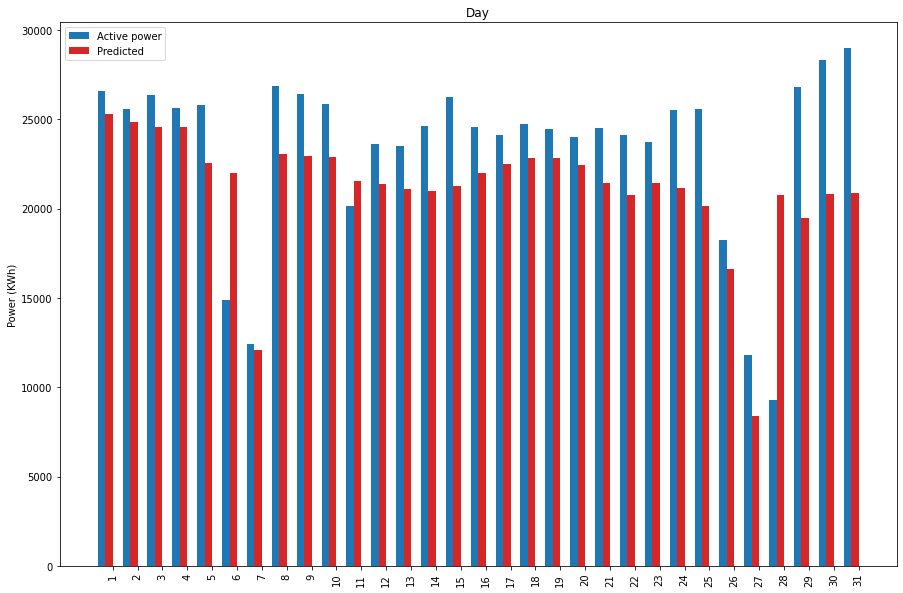

In [28]:
fig, ax = plt.subplots(figsize=(15, 10))

# A little data preparation
days = daily_energy.day
x = np.arange(len(days))

width=0.3

# Plot each bar plot. Note: manually calculating the 'dodges' of the bars
ax.bar(x - 3*width/2, daily_energy['active_power'], width, label='Active power', color='tab:blue')
ax.bar(x - width/2, daily_energy['predicted'], width, label='Predicted', color='tab:red')

# Customise some display properties
ax.set_ylabel('Power (KWh)')
ax.set_title('Day')
ax.set_xticks(x)    # This ensures we have one tick per year, otherwise we get fewer
ax.set_xticklabels(days.astype(str).values, rotation='vertical')
ax.legend()

# Ask Matplotlib to show the plot
plt.show()

In [29]:
daily_energy['error %']=abs(daily_energy.active_power-daily_energy.predicted)/daily_energy.active_power*100

In [30]:
print(daily_energy.drop(columns=['day']).to_latex())

\begin{tabular}{llll}
\toprule
{} & active\_power & predicted &  error \% \\
day &              &           &          \\
\midrule
1   &        26591 &   25276.2 &  4.94451 \\
2   &      25591.3 &   24845.3 &    2.915 \\
3   &      26369.3 &   24569.9 &  6.82365 \\
4   &      25653.5 &   24580.3 &  4.18367 \\
5   &      25799.2 &   22532.1 &  12.6635 \\
6   &      14893.4 &   21971.4 &  47.5238 \\
7   &      12447.2 &     12068 &  3.04595 \\
8   &      26870.1 &   23083.9 &  14.0908 \\
9   &      26439.5 &   22970.2 &  13.1215 \\
10  &      25871.5 &   22892.1 &   11.516 \\
11  &      20133.6 &   21540.7 &   6.9892 \\
12  &      23629.5 &   21395.8 &  9.45291 \\
13  &      23522.9 &   21117.4 &  10.2258 \\
14  &      24647.2 &   21002.3 &  14.7885 \\
15  &      26219.8 &   21249.8 &  18.9551 \\
16  &      24562.1 &   21997.9 &    10.44 \\
17  &      24141.4 &   22516.1 &  6.73262 \\
18  &      24720.7 &   22806.8 &  7.74229 \\
19  &      24431.8 &   22808.3 &  6.64477 \\
20  &      240

In [31]:
df.tail(50)

,active_power,timestamp,tomorrow,temp_air,windSpeed,weatherCode,altidute,hour,predicted,datetime,day
467,697.200000,1630076400,374.0,27.43,2.62,1101,25.019608,15,312.916919,2021-08-27 15:00:00,27
468,116.766667,1630080000,221.0,26.53,1.93,1100,13.428394,16,165.236282,2021-08-27 16:00:00,27
475,67.166667,1630126800,41.0,21.63,1.50,1000,10.575873,5,255.467495,2021-08-28 05:00:00,28
476,0.000000,1630130400,191.0,22.98,0.88,1100,22.150692,6,732.713830,2021-08-28 06:00:00,28
477,0.000000,1630134000,381.0,24.47,0.95,1000,33.545832,7,1237.170323,2021-08-28 07:00:00,28
478,0.000000,1630137600,552.0,25.55,1.12,1100,44.253945,8,2465.944843,2021-08-28 08:00:00,28
479,0.000000,1630141200,699.0,26.76,1.71,1100,53.393611,9,3116.628071,2021-08-28 09:00:00,28
480,0.000000,1630144800,830.0,27.91,2.75,1000,59.332453,10,3083.052970,2021-08-28 10:00:00,28
481,349.533333,1630148400,884.0,28.58,3.37,1000,60.005364,11,3226.704590,2021-08-28 11:00:00,28
482,3309.666667,1630152000,858.0,28.87,3.89,1000,55.097106,12,2854.954196,2021-08-28 12:00:00,28


In [32]:
df[df.day==]

SyntaxError: ignored